<a href="https://colab.research.google.com/github/shiv-coder/AIDI1002W2026/blob/main/Module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving student_data.csv to student_data (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        15 non-null     object 
 1   Gender           15 non-null     object 
 2   StudyHours       14 non-null     float64
 3   Attendance       14 non-null     float64
 4   PreviousScore    14 non-null     float64
 5   SleepHours       14 non-null     float64
 6   ParentEducation  15 non-null     object 
 7   ExamScore        15 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ KB
Write 4–5 sentences describing:
- Number of rows and columns
- Data types of each column
- Any unusual or missing data you observe
Write 5–6 sentences describing:
- Missing values count
- How you handled them
- Outliers in StudyHours or ExamScore
Write 4–6 sentences explaining:
- One example each of filtering, grouping, encodi

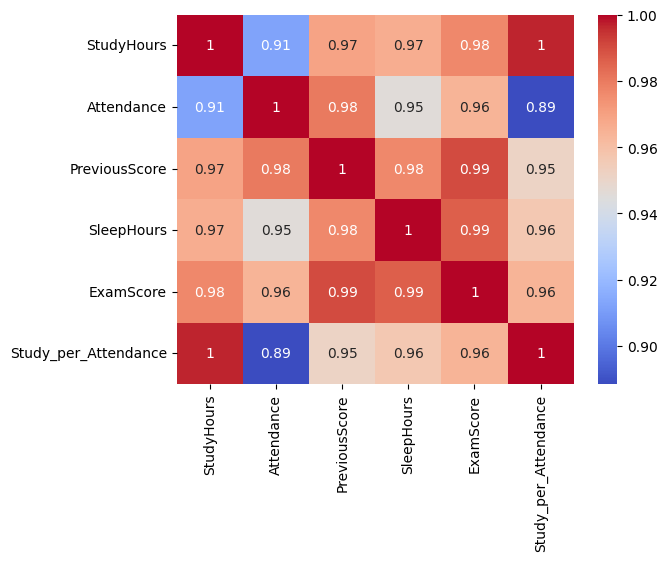

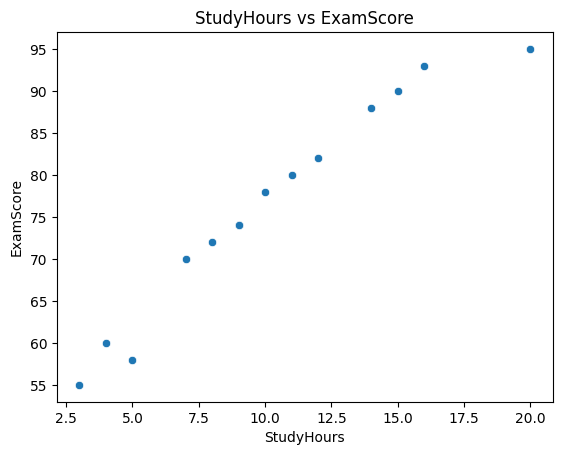

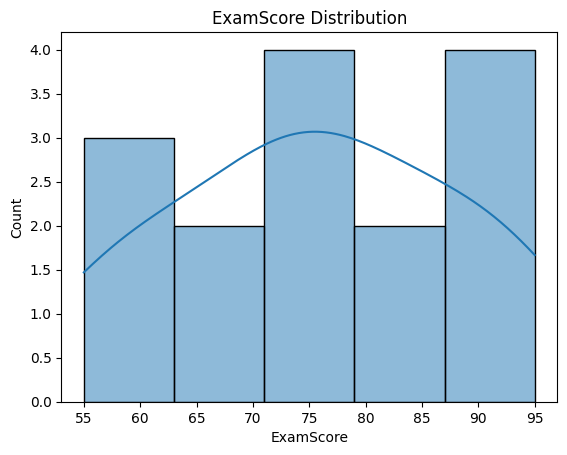

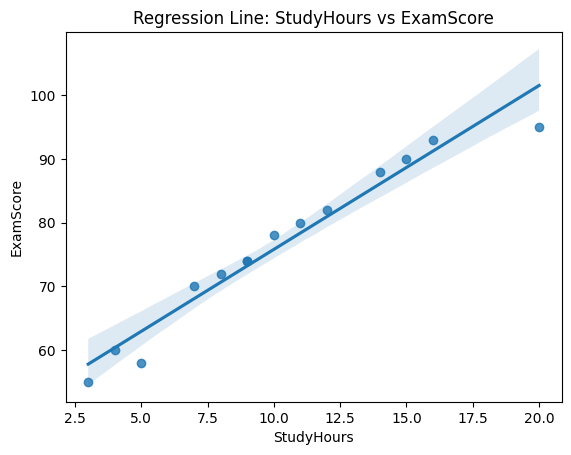

Write 6–8 sentences describing:
- Correlated numeric variables
- Patterns/trends
- Which graph helped most
Write 5–6 sentences:
- Why do we split data?
- Why is scaling important?
- Difference between StandardScaler and MinMaxScaler


In [7]:
# This is a ready-to-use Jupyter Notebook for Student Dataset EDA
# Activities 1-5 with explanations and student tasks

# =====================
# Activity 1: DATA COLLECTION (2.1)
# =====================

# STEP 1: Import pandas
import pandas as pd

# STEP 2: Load dataset from CSV
# Upload student_data.csv before running
from google.colab import files
uploaded = files.upload()

# STEP 3: Read the CSV file into a DataFrame
df = pd.read_csv('student_data.csv')

# STEP 4: Inspect first 5 rows
df.head()

# STEP 5: Check number of rows, columns, and data types
df.info()

# STEP 6: Basic statistical summary for numeric columns
df.describe()

# STEP 7: Student writing task
print("Write 4–5 sentences describing:")
print("- Number of rows and columns")
print("- Data types of each column")
print("- Any unusual or missing data you observe")


# =====================
# Activity 2: DATA CLEANING (2.2)
# =====================

# STEP 1: Count missing values in each column
df.isna().sum()

# STEP 2A: Drop rows with missing values
df_dropna = df.dropna()

# STEP 2B: Fill missing numeric values with mean
df_fillna = df.fillna(df.mean(numeric_only=True))

# STEP 3: Remove duplicate rows
duplicates_count = df.duplicated().sum()
df_unique = df.drop_duplicates()

# STEP 4: Detect and fix inconsistent categorical values
df["Gender"] = df["Gender"].str.strip().str.capitalize()
df["ParentEducation"] = df["ParentEducation"].str.strip().str.title()

# STEP 5: Outlier detection using IQR (Example: StudyHours)
Q1 = df["StudyHours"].quantile(0.25)
Q3 = df["StudyHours"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df["StudyHours"] < lower) | (df["StudyHours"] > upper)]

# STEP 6: Student writing task
print("Write 5–6 sentences describing:")
print("- Missing values count")
print("- How you handled them")
print("- Outliers in StudyHours or ExamScore")


# =====================
# Activity 3: DATA MANIPULATION (2.3)
# =====================

# STEP 1: Encode categorical variables
df_encoded_gender = pd.get_dummies(df["Gender"])
df_encoded_edu = pd.get_dummies(df["ParentEducation"])

# STEP 2: Add encoded columns to main dataset
df = pd.concat([df, df_encoded_gender, df_encoded_edu], axis=1)

# STEP 3: Aggregation example: Average ExamScore per ParentEducation
avg_score_by_edu = df.groupby("ParentEducation")["ExamScore"].mean()

# STEP 4: Filtering data: Students with ExamScore > 85
high_scores = df[df["ExamScore"] > 85]

# STEP 5: Merge datasets (simulate extra dataset)
extra = pd.DataFrame({
    "StudentID": ["S001", "S002", "S003"],
    "ExtraCredit": [5, 3, 4]
})
merged = df.merge(extra, on="StudentID", how="left")

# STEP 6: Feature Engineering
df["Study_per_Attendance"] = df["StudyHours"] / df["Attendance"]
df["Sleep_Category"] = df["SleepHours"].apply(lambda x: "Low" if x < 6 else "Normal")

# STEP 7: Student writing task
print("Write 4–6 sentences explaining:")
print("- One example each of filtering, grouping, encoding, feature creation")


# =====================
# Activity 4: DATA MODELING (2.4)
# =====================

import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Correlation matrix
correlation = df.select_dtypes(include='number').corr()

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

# STEP 2: Scatter plot (StudyHours vs ExamScore)
sns.scatterplot(x=df["StudyHours"], y=df["ExamScore"])
plt.title("StudyHours vs ExamScore")
plt.show()

# STEP 3: Histogram (ExamScore distribution)
sns.histplot(df["ExamScore"], kde=True)
plt.title("ExamScore Distribution")
plt.show()

# STEP 4: Optional regression trendline
sns.regplot(x="StudyHours", y="ExamScore", data=df)
plt.title("Regression Line: StudyHours vs ExamScore")
plt.show()

# STEP 5: Student writing task
print("Write 6–8 sentences describing:")
print("- Correlated numeric variables")
print("- Patterns/trends")
print("- Which graph helped most")


# =====================
# Activity 5: DATA PREPARATION (2.5)
# =====================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# STEP 1: Select numeric features and target
X = df[["StudyHours", "Attendance", "PreviousScore", "SleepHours"]]
y = df["ExamScore"]

# STEP 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 3: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 4: MinMax scaling
minmax = MinMaxScaler()
X_train_mm = minmax.fit_transform(X_train)
X_test_mm = minmax.transform(X_test)

# STEP 5: Student writing task
print("Write 5–6 sentences:")
print("- Why do we split data?")
print("- Why is scaling important?")
print("- Difference between StandardScaler and MinMaxScaler")